In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import numpy as np

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('astro_lsst_01_1000_sqlite.db')
outDir = 'astrometry_dcr'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
sql = 'night < %i' % (365.25*5) 
slicer = slicers.HealpixSlicer(nside=8)
metricList = []
metricList.append(metrics.ParallaxDcrDegenMetric())
metricList.append(metrics.ParallaxDcrDegenMetric(rmag=24., SedTemplate='B', metricName='DCR-Degen-faint-B'))

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes


In [4]:
bundleList = []
for metric in metricList:
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

In [5]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database with constraint night < 1826
Found 1235603 visits
Running:  ['opsim_DCR-Degen-faint-B_night_lt_1826_HEAL']
Completed metric generation.

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/stackers/baseStacker.py:122: UserWarning: Warning - column ra_dcr_amp already present in simData, will be overwritten.
  %(col))
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/stackers/baseStacker.py:122: UserWarning: Warning - column dec_dcr_amp already present in simData, will be overwritten.
  %(col))
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/stackers/baseStacker.py:122: UserWarning: Warning - column zenithDistance already present in simData, will be overwritten.
  %(col))
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/stackers/baseStacker.py:122: UserWarning: Warning - column PA already present in simData, will be overwritten.
  %(col))
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/stackers/baseStacker.py:122: UserWarning: Warning - column HA already present in simData, will be overwritten.
  %(col))
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/stackers/baseStacker.py:122: UserWarning: 


Running:  ['opsim_ParallaxDcrDegenMetric_night_lt_1826_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/stackers/baseStacker.py:122: UserWarning: Warning - column dec_pi_amp already present in simData, will be overwritten.
  %(col))


Plotting figures with night < 1826 sqlconstraint now.
monopole: 0.32705  dipole: lon: -40.3419, lat: 84.4978, amp: 0.576929
monopole: 0.307742  dipole: lon: -58.6675, lat: 78.3826, amp: 0.554904
Plotting complete.


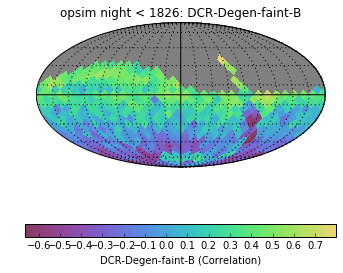

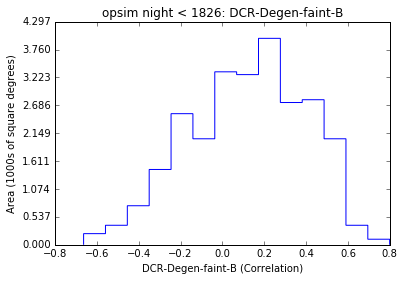

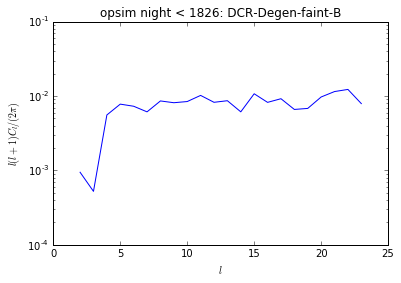

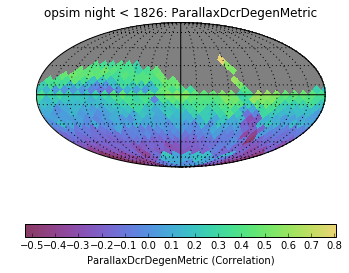

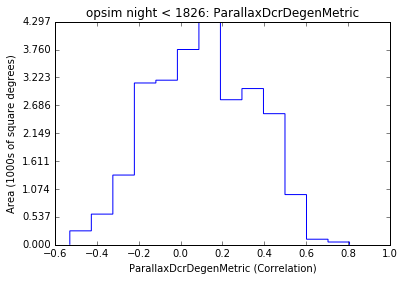

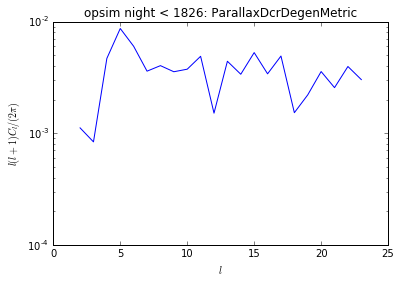

In [6]:
bgroup.plotAll(closefigs=False)

In [7]:
np.min(np.abs(bundleList[0].metricValues))

3.553398847556474e-05